# ***Importation des packages***

In [1]:
import pandas as pd # pour manipuler les dataframes
import numpy as np  #pour manipuler les dataframes comme des tableaux(Array)

from  sklearn.model_selection import train_test_split # pour deviser les données (partie Training et partie Test)

from sklearn.tree import DecisionTreeRegressor #importation du modele decision tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression,Lasso #importation du modele regression lineaire

from sklearn.metrics import classification_report,confusion_matrix # pour tester la performance de notre modele

from sklearn.model_selection import GridSearchCV, ShuffleSplit # pour determiner le meilleur
                                                                # modele avec les meilleures parametres


import matplotlib.pyplot as plt # Pour la visualisation des données
import seaborn as sns # Pour la visualisation des données ( basée sur matplotlib)

from sklearn.preprocessing import StandardScaler #pour la normalisation des données

# ***Importation du data***

In [2]:
data=pd.read_csv('car details v3.csv')

In [3]:
data.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0


# ***Exploration de données(EDA)***

In [4]:
data.shape  #pour afficher le nombre de lignes et le nombre de colonnes

(8128, 13)

In [5]:
data.head(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,250Nm@ 1500-2500rpm,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"12.7@ 2,700(kgm@ rpm)",5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"11.5@ 4,500(kgm@ rpm)",5.0
5,Hyundai Xcent 1.2 VTVT E Plus,2017,440000,45000,Petrol,Individual,Manual,First Owner,20.14 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
6,Maruti Wagon R LXI DUO BSIII,2007,96000,175000,LPG,Individual,Manual,First Owner,17.3 km/kg,1061 CC,57.5 bhp,"7.8@ 4,500(kgm@ rpm)",5.0
7,Maruti 800 DX BSII,2001,45000,5000,Petrol,Individual,Manual,Second Owner,16.1 kmpl,796 CC,37 bhp,59Nm@ 2500rpm,4.0
8,Toyota Etios VXD,2011,350000,90000,Diesel,Individual,Manual,First Owner,23.59 kmpl,1364 CC,67.1 bhp,170Nm@ 1800-2400rpm,5.0
9,Ford Figo Diesel Celebration Edition,2013,200000,169000,Diesel,Individual,Manual,First Owner,20.0 kmpl,1399 CC,68.1 bhp,160Nm@ 2000rpm,5.0


In [6]:
data.dtypes

name              object
year               int64
selling_price      int64
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage           object
engine            object
max_power         object
torque            object
seats            float64
dtype: object

In [7]:
data.describe()

,year,selling_price,km_driven,seats
count,8128.000000,8.128000e+03,8.128000e+03,7907.000000
mean,2013.804011,6.382718e+05,6.981951e+04,5.416719
std,4.044249,8.062534e+05,5.655055e+04,0.959588
min,1983.000000,2.999900e+04,1.000000e+00,2.000000
25%,2011.000000,2.549990e+05,3.500000e+04,5.000000
50%,2015.000000,4.500000e+05,6.000000e+04,5.000000
75%,2017.000000,6.750000e+05,9.800000e+04,5.000000
max,2020.000000,1.000000e+07,2.360457e+06,14.000000


In [8]:
data.describe(include=object)

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,8128,8128,8128,8128,8128,7907,7907,7913,7906
unique,2058,4,3,2,5,393,121,322,441
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,129,4402,6766,7078,5289,225,1017,377,530


In [9]:
data.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           222
seats            221
dtype: int64

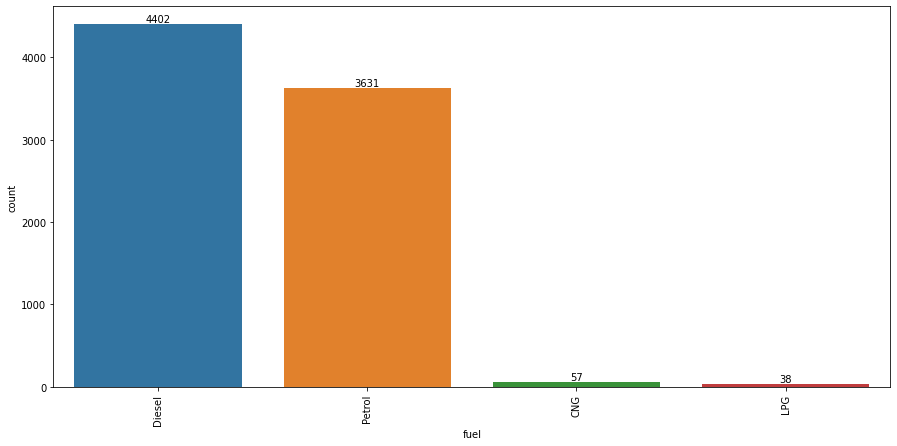

In [10]:
def bar_plot(data,col):
  plt.figure(figsize = (15, 7))
  plot = sns.countplot(x = col, data = data,
                       order = data[col].value_counts().index)
  plt.xticks(rotation = 90)
  for p in plot.patches:
      plot.annotate(p.get_height(), 
                          (p.get_x() + p.get_width() / 2.0, 
                          p.get_height()), 
                          ha = 'center', 
                          va = 'center', 
                          xytext = (0, 5),
                          textcoords = 'offset points')
bar_plot(data,'fuel')      

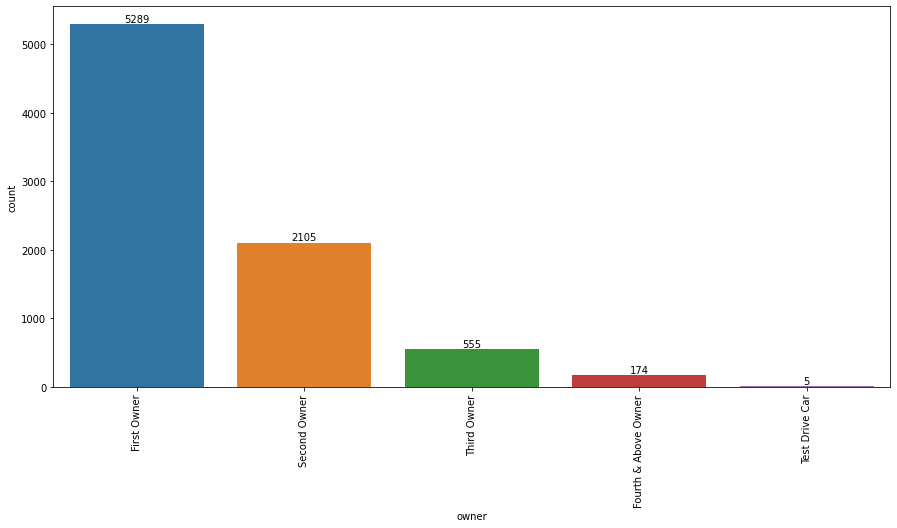

In [11]:
bar_plot(data,'owner')

# ***Data preprocessing/Data Cleaning***

In [12]:
data.drop(['torque','seller_type'],axis=1,inplace=True)

In [13]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,5.0


In [14]:
def extraction(data,col):
  data[col] = data[col].str.split(" ", expand = True)[0]
def convert_tofloat(data,col)  :
  data[col]=pd.to_numeric(data[col])
def fillNAN(data,col):
  data[col].fillna(data[col].astype("float64").mean(), inplace = True)



In [15]:
extraction(data,'name')
extraction(data,'mileage')
extraction(data,'engine')
extraction(data,'max_power')

In [16]:
convert_tofloat(data,'mileage')
convert_tofloat(data,'engine')
convert_tofloat(data,'max_power')

In [17]:
fillNAN(data,'mileage')
fillNAN(data,'engine')
fillNAN(data,'seats')
fillNAN(data,'max_power')

In [18]:
data.isna().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
seats            0
dtype: int64

In [19]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Manual,Third Owner,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


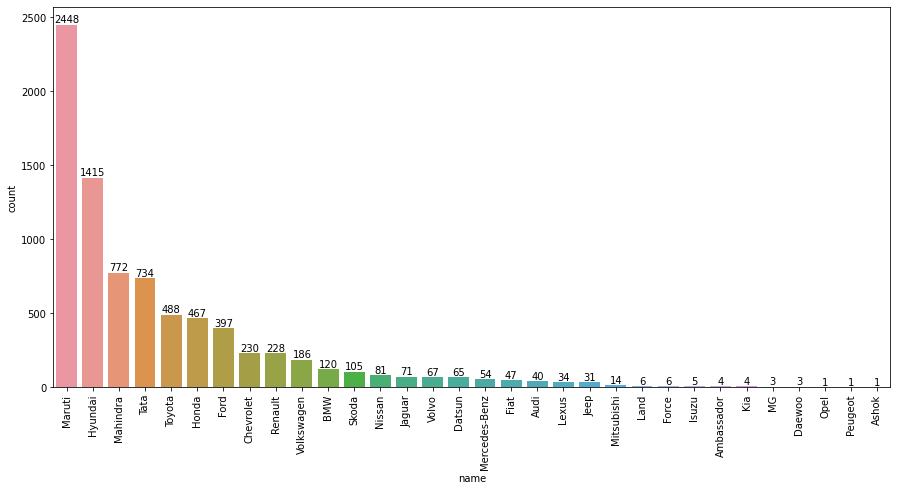

In [20]:
bar_plot(data,'name')
#name ayant un count <15 va etre considerer comme other

In [21]:
car_count=data['name'].value_counts(ascending=False)
car_count_less15=car_count[car_count<15]
print(car_count_less15)

Mitsubishi    14
Land           6
Force          6
Isuzu          5
Ambassador     4
Kia            4
MG             3
Daewoo         3
Opel           1
Peugeot        1
Ashok          1
Name: name, dtype: int64


In [22]:
data['name'] = data['name'].apply(lambda x: 'other' if x in car_count_less15 else x)

In [23]:
data.sample(10)

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
968,Volkswagen,2012,350000,40000,Diesel,Manual,First Owner,20.540000,1598.000000,103.60,5.000000
192,Maruti,2010,215000,120600,Petrol,Manual,Second Owner,18.900000,998.000000,67.10,5.000000
1014,Mahindra,2013,900000,85036,Diesel,Manual,Second Owner,15.100000,2179.000000,140.00,7.000000
576,Maruti,2011,204999,97500,Petrol,Manual,First Owner,19.418783,1458.625016,0.00,5.416719
5035,Maruti,2018,350000,10000,Petrol,Manual,First Owner,23.950000,998.000000,67.05,5.000000
2432,Maruti,2016,640000,80000,Diesel,Manual,Second Owner,24.520000,1248.000000,88.50,7.000000
6787,Hyundai,2018,350000,25000,Petrol,Manual,First Owner,21.100000,814.000000,55.20,5.000000
967,Maruti,2015,550000,23000,Diesel,Manual,First Owner,25.200000,1248.000000,74.00,5.000000
5525,Maruti,2012,350000,145000,Diesel,Manual,Third Owner,22.900000,1248.000000,74.00,5.000000
6830,Ford,2012,190000,112000,Diesel,Manual,Second Owner,20.000000,1399.000000,68.00,5.000000


***les voitures manuels et automatiques***

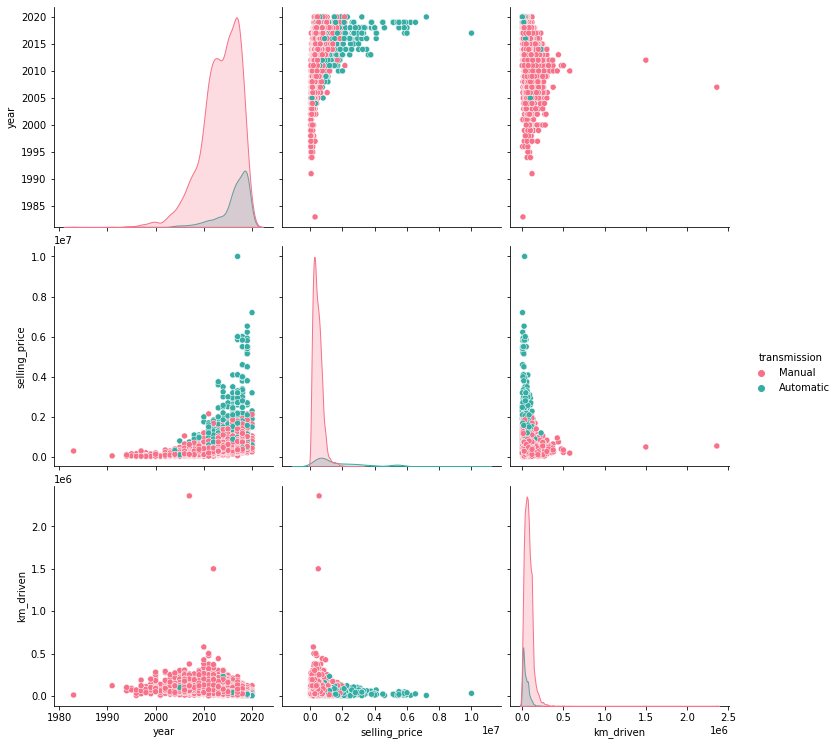

In [24]:
sns.pairplot(data[['year','selling_price','km_driven','transmission']],hue = 'transmission',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

#le prix du voitures automatique est plus elevé que de celle du voitures manuelles
# le nombre des voitures automatiques augmente les derniers années (entre 2015 et 2020)

***le type du carburant***

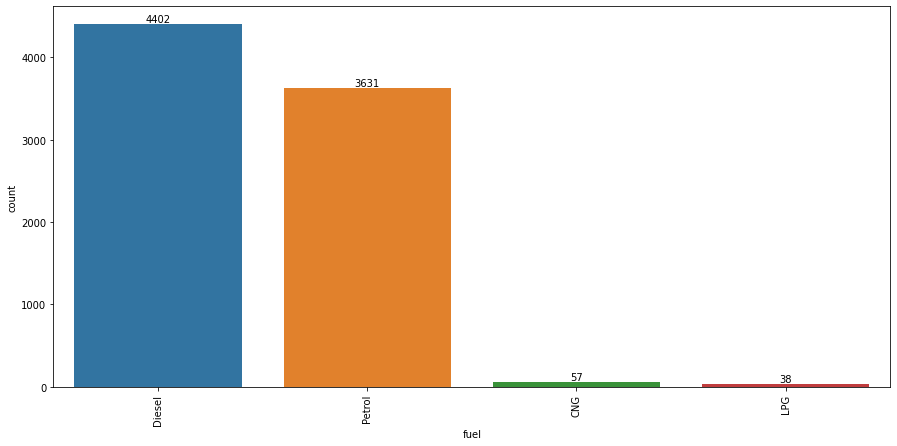

In [25]:
bar_plot(data,'fuel')
#on constate que les 2 types(diesel et pertrol) sont les plus trouvés dans les données
#donc l'idée de renommer les autres type par 'other'

In [26]:
data['fuel']=data['fuel'].apply(lambda x : x if x in ['Diesel','Petrol'] else 'other' )

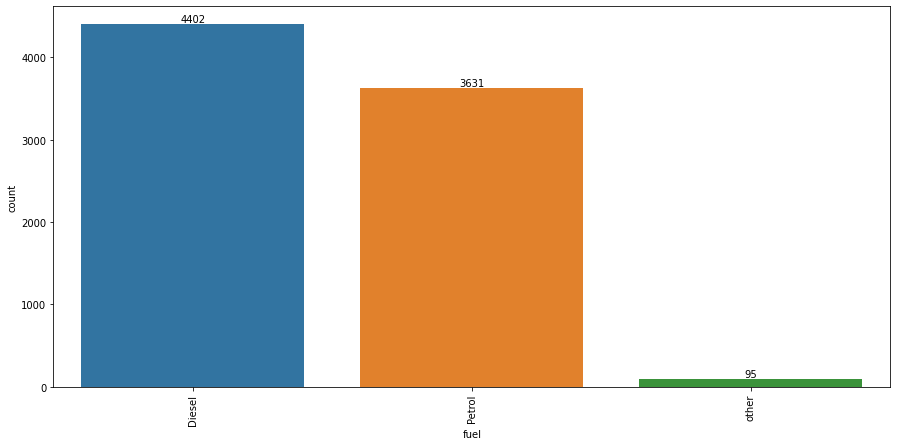

In [27]:
bar_plot(data,'fuel')

In [28]:
manuel = data[data['transmission']=='Manual']
automatique = data[data['transmission']=='Automatic']

les voitures automatique


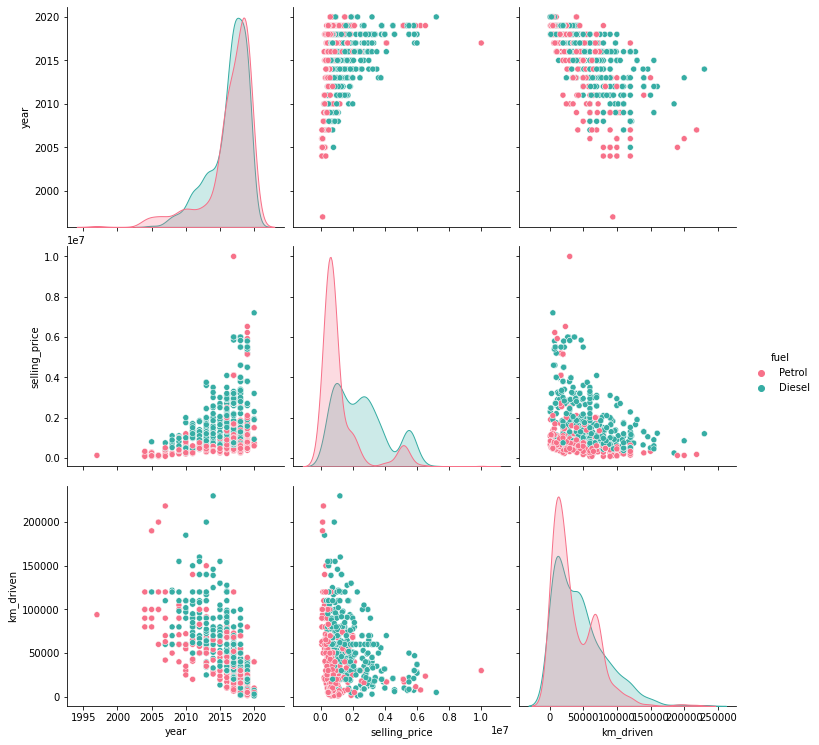

In [29]:
print('les voitures automatique')
sns.pairplot(automatique[['year','selling_price','km_driven','fuel']],hue = 'fuel',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

les voitures manuel


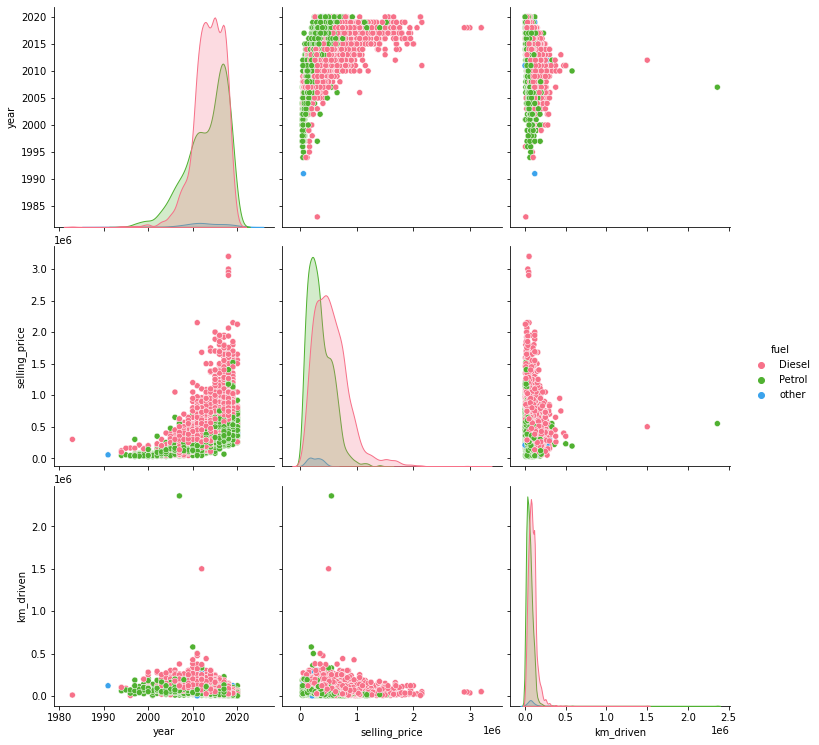

In [30]:
print('les voitures manuel')
sns.pairplot(manuel[['year','selling_price','km_driven','fuel']],hue = 'fuel',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

**propriétaire**

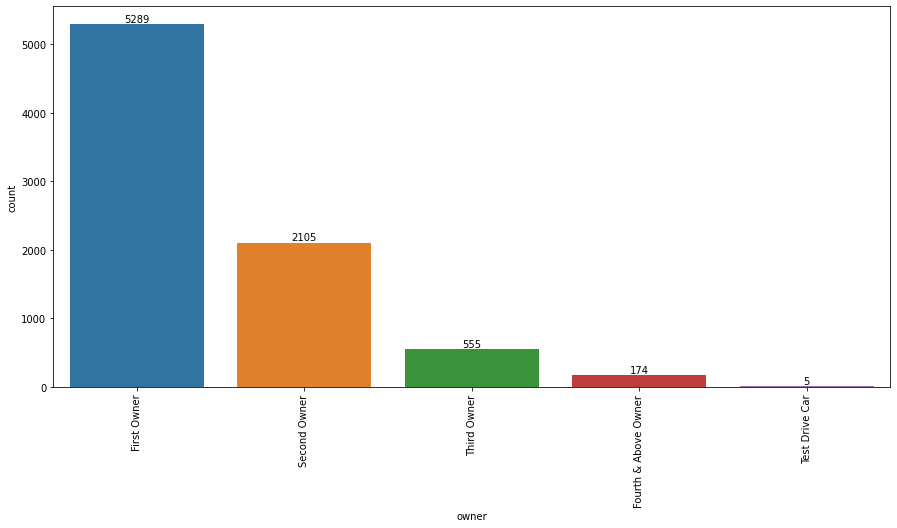

In [31]:
bar_plot(data,'owner')
#on a  5 voitures classés comme voitures d'essai(test Driver Car), donc l'idée c'est de les suprimer de notre dataset
# Aussi (fisrt owner et second owner ) presente la plus part de notre data , donc tous les autres type consederé comme (Third Owner & Above)

In [32]:
data = data[~(data['owner']=='Test Drive Car')]
data['owner'] = data['owner'].apply(lambda x: x if x in ['First Owner','Second Owner'] else 'Third Owner & Above')

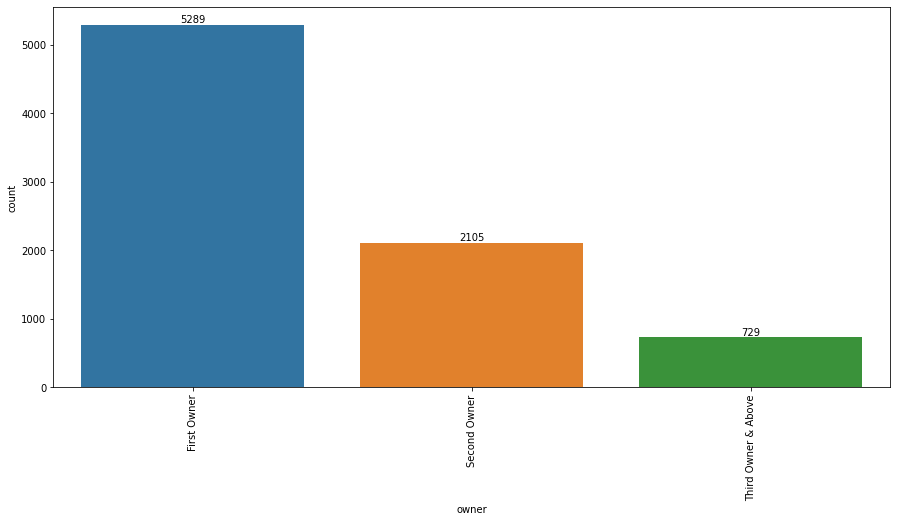

In [33]:
bar_plot(data,'owner')

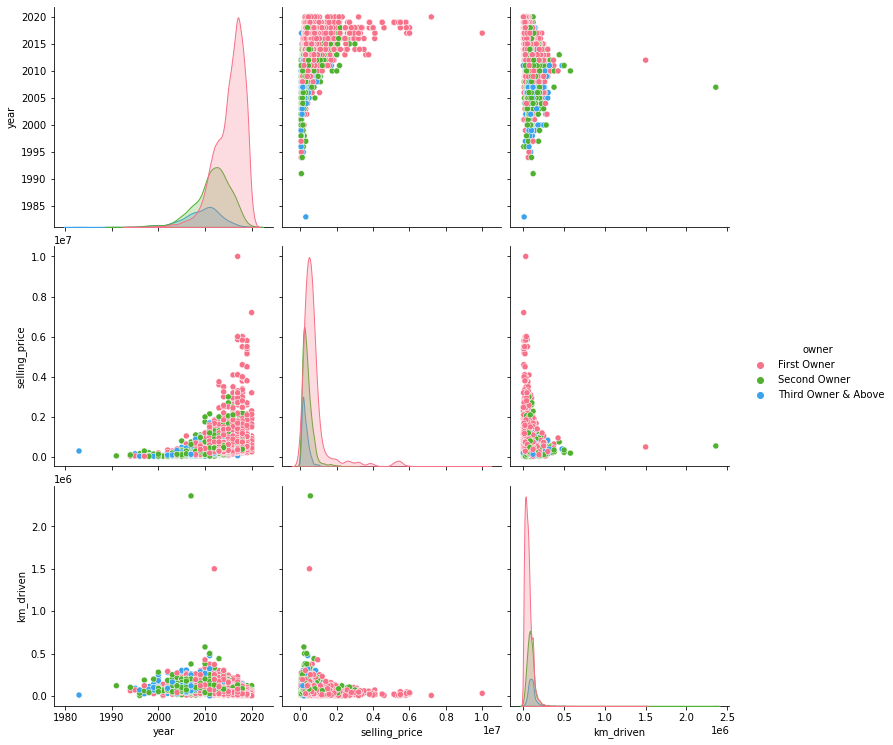

In [34]:
sns.pairplot(data[['year','selling_price','km_driven','owner']],hue = 'owner',diag_kind = "kde",kind = "scatter",palette = "husl",height=3.5)
plt.show()

***year and km_driven***

In [35]:
km_mean = data.groupby('year')['km_driven'].mean()
manual=data[data['transmission']=='Manual']
automatique=data[data['transmission']=='Automatic']

C:\Users\mouez\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\mouez\AppData\Local\Programs\Python\Python37\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


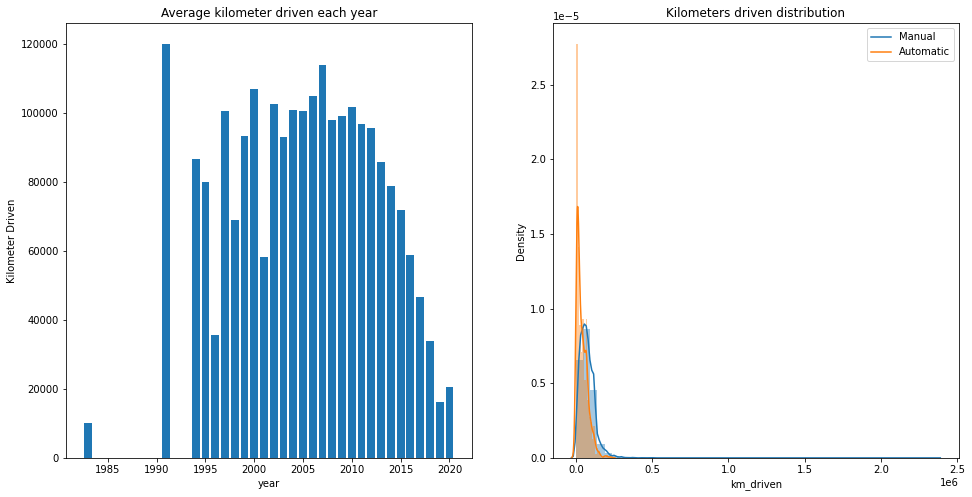

In [36]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,8))

ax[0].bar(km_mean.index,km_mean)
sns.distplot(manual['km_driven'],ax=ax[1])
sns.distplot(automatique['km_driven'],ax=ax[1])

ax[0].set_title('Average kilometer driven each year')
ax[0].set_xlabel('year')
ax[0].set_ylabel('Kilometer Driven')

ax[1].set_title('Kilometers driven distribution')
ax[1].legend(['Manual','Automatic'])

plt.show()

#Nous pouvons voir que les kilomètres parcourus en moyenne augmentent de 1995 à 2005
# et diminuent linéairement jusqu'en 2020. Nous pouvons également voir des outliers présentes dans le graphique de distribution.
#==>(outliers à supp)

***Year and Selling Price***

In [37]:
year_mean_manual = data[data['transmission']=='Manual'].groupby('year')['selling_price'].mean()
year_mean_automatic = data[data['transmission']=='Automatic'].groupby('year')['selling_price'].mean()

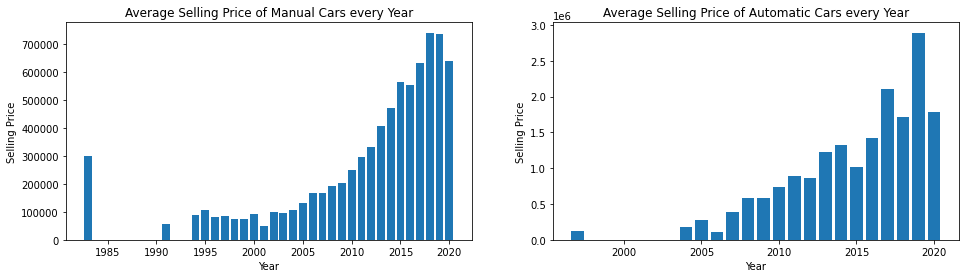

In [39]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)

ax[0].set_title('Average Selling Price of Manual Cars every Year')
ax[0].set_xlabel('Year')
ax[0].set_ylabel('Selling Price')

ax[1].set_title('Average Selling Price of Automatic Cars every Year')
ax[1].set_xlabel('Year')
ax[1].set_ylabel('Selling Price')

plt.show()

#Nous pouvons voir que le prix de vente des voitures manuelles augmente de manière linéaire 
#chaque année alors que les voitures automatiques ont des moyennes ondulées chaque année,
 #mais nous pouvons clairement voir que le prix de vente augmente également de manière linéaire.

# **Effacer les outliers**

**KM_driven**

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

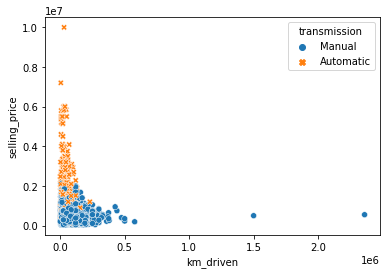

In [40]:
sns.scatterplot(data=data, x="km_driven", y="selling_price",hue='transmission',style='transmission')

In [41]:
def remove_outlier_km_driven(data):
    temp = pd.DataFrame()
    
    data_km_driven = data['km_driven']
    Q1 = data_km_driven.quantile(0.25)
    Q3 = data_km_driven.quantile(0.75)
    IQR = Q3 - Q1
    data_outlier = data_km_driven[(data_km_driven < (Q1 - 1.5 * IQR)) | (data_km_driven > (Q3 + 1.5 * IQR))]
    temp = pd.concat([temp,data_outlier])
        
    return data.drop(temp.index)

data = remove_outlier_km_driven(data)

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

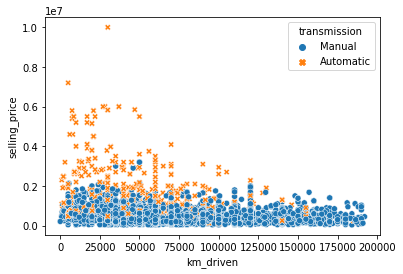

In [42]:
sns.scatterplot(data=data, x="km_driven", y="selling_price",hue='transmission',style='transmission')

**Selling Price**

In [43]:
def remove_outlier_selling_price(data):
    temp = pd.DataFrame()
    for year in sorted(data.year.unique()):
        year_price_manual = data[(data['year']==year) & (data['transmission']=='Manual')]['selling_price']
        manual_Q1 = year_price_manual.quantile(0.25)
        manual_Q3 = year_price_manual.quantile(0.75)
        manual_IQR = manual_Q3 - manual_Q1
        outlier_manual = year_price_manual[(year_price_manual < (manual_Q1 - 1.5 * manual_IQR)) | (year_price_manual > (manual_Q3 + 1.5 * manual_IQR))]
        temp = pd.concat([temp,outlier_manual])
        
        year_price_automatic = data[(data['year']==year) & (data['transmission']=='Automatic')]['selling_price']
        automatic_Q1 = year_price_automatic.quantile(0.25)
        automatic_Q3 = year_price_automatic.quantile(0.75)
        automatic_IQR = automatic_Q3 - automatic_Q1
        outlier_automatic = year_price_automatic[(year_price_automatic < (automatic_Q1 - 1.5 * automatic_IQR)) | (year_price_automatic > (automatic_Q3 + 1.5 * automatic_IQR))]
        temp = pd.concat([temp,outlier_automatic])
    return data.drop(temp.index)

data = remove_outlier_selling_price(data)

<AxesSubplot:xlabel='km_driven', ylabel='selling_price'>

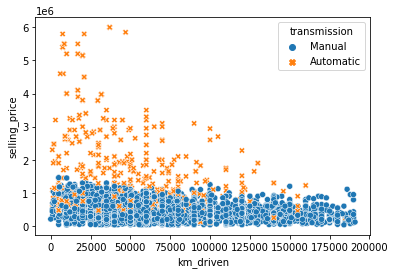

In [44]:
sns.scatterplot(data=data, x="km_driven", y="selling_price",hue='transmission',style='transmission')

**Year**

In [45]:
year_mean_manual = data[data['transmission']=='Manual'].groupby('year')['selling_price'].mean()
year_mean_automatic = data[data['transmission']=='Automatic'].groupby('year')['selling_price'].mean()

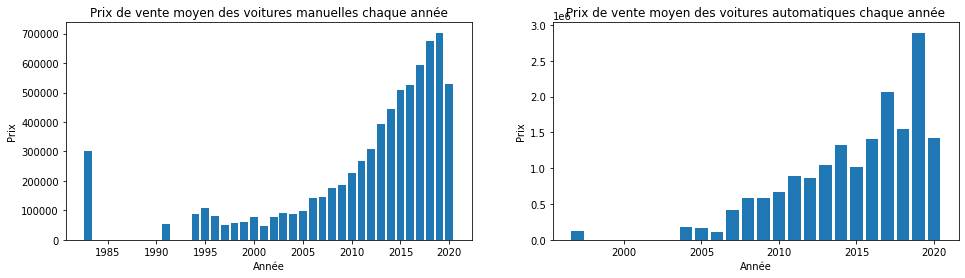

In [46]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)
ax[0].set_title('Prix de vente moyen des voitures manuelles chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Prix')
ax[1].set_title('Prix de vente moyen des voitures automatiques chaque année')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Prix')
plt.show()

In [47]:
data=data[data['year']>2005]

In [48]:
year_mean_manual = data[data['transmission']=='Manual'].groupby('year')['selling_price'].mean()
year_mean_automatic = data[data['transmission']=='Automatic'].groupby('year')['selling_price'].mean()

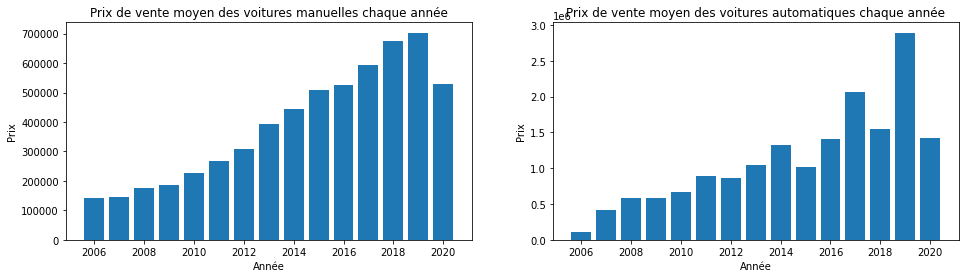

In [49]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(16,4))

ax[0].bar(year_mean_manual.index,year_mean_manual)
ax[1].bar(year_mean_automatic.index,year_mean_automatic)
ax[0].set_title('Prix de vente moyen des voitures manuelles chaque année')
ax[0].set_xlabel('Année')
ax[0].set_ylabel('Prix')
ax[1].set_title('Prix de vente moyen des voitures automatiques chaque année')
ax[1].set_xlabel('Année')
ax[1].set_ylabel('Prix')
plt.show()

In [ ]:
data.head()

,name,year,selling_price,km_driven,fuel,transmission,owner,mileage,engine,max_power,seats
0,Maruti,2014,450000,145500,Diesel,Manual,First Owner,23.40,1248.0,74.00,5.0
1,Skoda,2014,370000,120000,Diesel,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda,2006,158000,140000,Petrol,Manual,Third Owner & Above,17.70,1497.0,78.00,5.0
3,Hyundai,2010,225000,127000,Diesel,Manual,First Owner,23.00,1396.0,90.00,5.0
4,Maruti,2007,130000,120000,Petrol,Manual,First Owner,16.10,1298.0,88.20,5.0


Text(0.5, 1.0, 'Matrice de correclation')

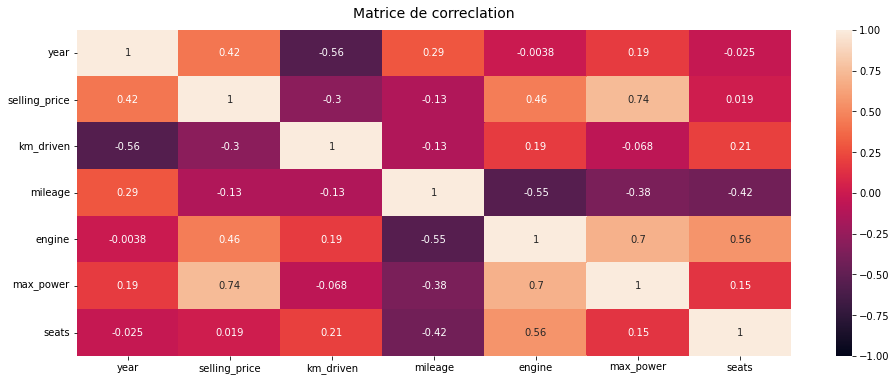

In [50]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Matrice de correclation', fontdict={'fontsize':14}, pad=12)

In [51]:
data.drop(['mileage','seats'],axis=1,inplace=True)

# **Save the cleaned data in csv file**

In [52]:
data.to_csv('car_price.csv',index=False)